In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load the dataset
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv('wdbc.data', header=None, names=columns)

# Show the first 5 rows
print(data.head(10))

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   
5    843786         M      12.45      15.70      82.57      477.1    0.12780   
6    844359         M      18.25      19.98     119.60     1040.0    0.09463   
7  84458202         M      13.71      20.83      90.20      577.9    0.11890   
8    844981         M      13.00      21.82      87.50      519.8    0.12730   
9  84501001         M      12.46      24.04      83.97      475.9    0.11860   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760    0.30010    0.14710  ... 

In [3]:
print(data.tail(10))

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
559  925291         B      11.51      23.93      74.52      403.5    0.09261   
560  925292         B      14.05      27.15      91.38      600.4    0.09929   
561  925311         B      11.20      29.37      70.67      386.0    0.07449   
562  925622         M      15.22      30.62     103.40      716.9    0.10480   
563  926125         M      20.92      25.09     143.00     1347.0    0.10990   
564  926424         M      21.56      22.39     142.00     1479.0    0.11100   
565  926682         M      20.13      28.25     131.20     1261.0    0.09780   
566  926954         M      16.60      28.08     108.30      858.1    0.08455   
567  927241         M      20.60      29.33     140.10     1265.0    0.11780   
568   92751         B       7.76      24.54      47.92      181.0    0.05263   

     Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
559    0.10210    0.11120    0.04105  

In [4]:
data.shape

(569, 32)

In [5]:
data.drop('ID', axis=1, inplace=True)

In [6]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

In [14]:
data.isnull().sum()

Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Diagnosis   569 non-null    int64  
 1   Feature_1   569 non-null    float64
 2   Feature_2   569 non-null    float64
 3   Feature_3   569 non-null    float64
 4   Feature_4   569 non-null    float64
 5   Feature_5   569 non-null    float64
 6   Feature_6   569 non-null    float64
 7   Feature_7   569 non-null    float64
 8   Feature_8   569 non-null    float64
 9   Feature_9   569 non-null    float64
 10  Feature_10  569 non-null    float64
 11  Feature_11  569 non-null    float64
 12  Feature_12  569 non-null    float64
 13  Feature_13  569 non-null    float64
 14  Feature_14  569 non-null    float64
 15  Feature_15  569 non-null    float64
 16  Feature_16  569 non-null    float64
 17  Feature_17  569 non-null    float64
 18  Feature_18  569 non-null    float64
 19  Feature_19  569 non-null    f

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
Feature_1,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
Feature_2,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
Feature_3,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
Feature_4,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
Feature_5,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
Feature_6,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
Feature_7,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
Feature_8,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
Feature_9,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [10]:
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"Number of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")

Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


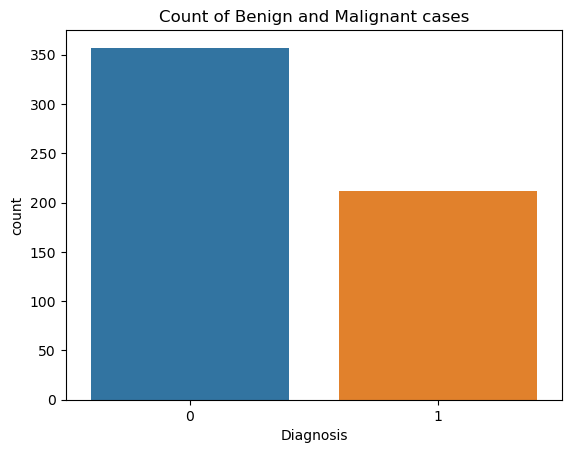

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of the target variable (Benign vs Malignant)
sns.countplot(x='Diagnosis', data=data)
plt.title('Count of Benign and Malignant cases')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (398, 30)
Testing data shape: (171, 30)
